In [1]:
# JSS
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from pathlib import Path

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '6'

from hloc.utils.viz import plot_images, plot_keypoints
feature_conf = {'output': 'feats-superpoint-n4096-r1024_T3', 'model': {'name': 'superpoint', 'nms_radius': 3, 'max_keypoints': 4096}, 'preprocessing': {'grayscale': True, 'resize_max': 1024}}
from hloc import feature_extractor_new 
from hloc import extract_feature_single_masked

In [2]:
path = Path("/home/Hierarchical-Localization/datasets/Trajectory3/Image_choosen")
image_path = path/"image2.png"
mask_path = path/"image_mask_2.png"

In [3]:
image = cv2.imread(str(image_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

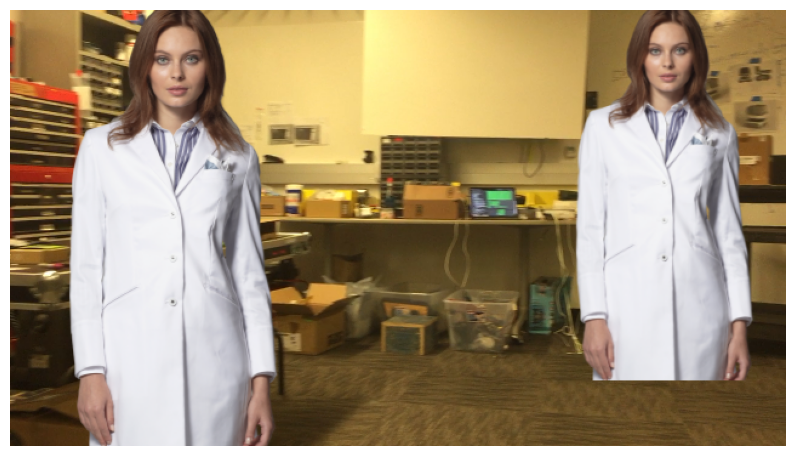

In [4]:
plot_images([image])

In [5]:
query_stuff = feature_extractor_new.main(feature_conf, gray)

Loaded SuperPoint model


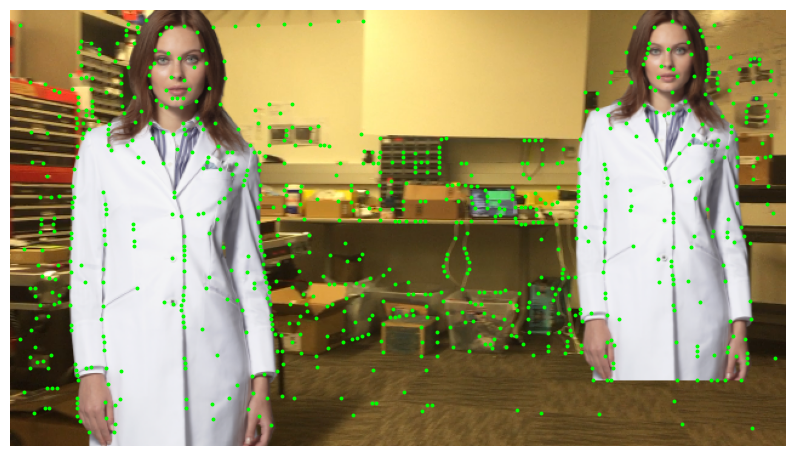

In [31]:
plot_images([image])
plot_keypoints([query_stuff["keypoints"]], ps =8)

In [32]:
np.shape(query_stuff['keypoints'])

(882, 2)

In [33]:
def keypoint_remover(query_stuff, mask):
    list_del = []
    for i in range(np.shape(query_stuff["keypoints"])[0]):
        kp = ((query_stuff["keypoints"])[i,:]).astype(int)
        if mask[kp[1], kp[0]] != 0:
            list_del.append(i)
    query_stuff["keypoints"] = np.delete(query_stuff["keypoints"], np.asarray(list_del), 0)
    query_stuff["descriptors"] = np.delete(query_stuff["descriptors"], np.asarray(list_del), 1)
    query_stuff["scores"] = np.delete(query_stuff["scores"], np.asarray(list_del))
    return query_stuff

In [34]:
mask = cv2.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)

In [35]:
query_stuff_removed = keypoint_remover(query_stuff, mask)

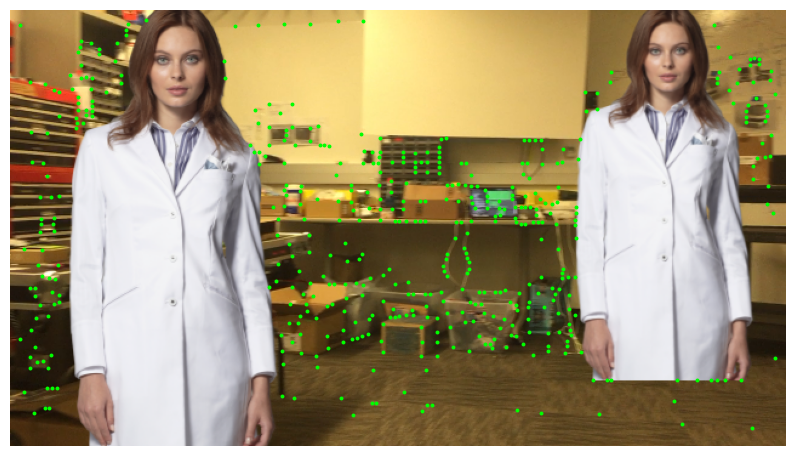

In [36]:
plot_images([image])
plot_keypoints([query_stuff_removed["keypoints"]], ps =8)

In [37]:
np.shape(query_stuff_removed['keypoints'])

(502, 2)

Loaded SuperPoint model


(220, 2)

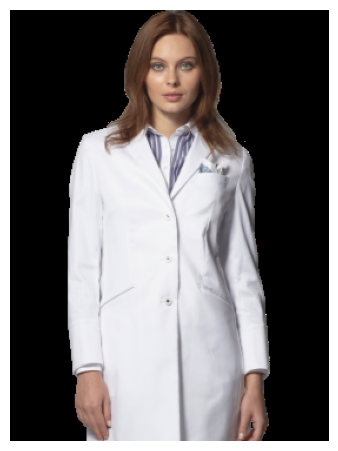

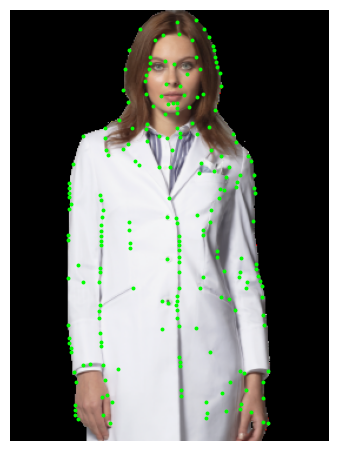

In [16]:
## check the number of keypoints in coats
image_path_coat = Path("/home/Hierarchical-Localization/datasets/Trajectory3/coat.png")
image_coat = cv2.imread(str(image_path_coat))
image_coat = cv2.cvtColor(image_coat, cv2.COLOR_BGR2RGB)
gray_coat = cv2.cvtColor(image_coat, cv2.COLOR_RGB2GRAY)
plot_images([image_coat])
query_stuff_coat = feature_extractor_new.main(feature_conf, gray_coat)
plot_images([image_coat])
plot_keypoints([query_stuff_coat["keypoints"]], ps =8)
np.shape(query_stuff_coat["keypoints"])

In [ ]:
"""img_added = image_adder(image, image_coat, reshape=True, scale=0.5)
plot_images([img_added])"""

In [ ]:
result"""### Image adder 
# Takes the input as the original image, image_to_be_added, the position where it is to be added,
# and if the shape of the image to be added should be changed and its scale factor
# send in RGB image and get RGB image
def image_adder(image_original, image_add, position= [0,0], reshape= False, scale=1):
    if reshape:
        width = int(image_add.shape[1]*scale)
        height = int(image_add.shape[0]*scale)
        dim= (width, height)
        # resize image
        image_add = cv2.resize(image_add, dim, interpolation = cv2.INTER_AREA)
    rows,cols,channels = image_add.shape
    roi = image_original[position[0]:position[0]+rows, position[1]:position[1]+cols ]
    image_add2gray = cv2.cvtColor(image_add,cv2.COLOR_RGB2GRAY)
    ret, mask = cv2.threshold(image_add2gray, 10, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)

    # Now black-out the area of logo in ROI
    img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
    # Take only region of logo from logo image.
    img2_fg = cv2.bitwise_and(image_add,image_add,mask = mask)
    
    # Put logo in ROI and modify the main image
    dst = cv2.add(img1_bg,img2_fg)
    image_original[position[0]:position[0]+rows, position[1]:position[1]+cols ] = dst
    return image_original"""

In [ ]:
#jss
# import argparse
# import logging
# from pathlib import Path
# import h5py
# import numpy as np
# import torch
# import json
# import cv2
# import numpy as np
# from pathlib import Path
# from hfnet.settings import EXPER_PATH
# # from notebooks.utils import plot_images, plot_matches, add_frame

# import tensorflow as tf
# from tensorflow.python.saved_model import tag_constants
# tf.contrib.resampler  # import C++ op

# %load_ext autoreload
# %autoreload 2
# %matplotlib inline

In [ ]:
# class HFNet:
#     def __init__(self, model_path, outputs):
#         self.session = tf.Session()
#         self.image_ph = tf.placeholder(tf.float32, shape=(None, None, 3))

#         net_input = tf.image.rgb_to_grayscale(self.image_ph[None])
#         tf.saved_model.loader.load(
#             self.session, [tag_constants.SERVING], str(model_path),
#             clear_devices=True,
#             input_map={'image:0': net_input})

#         graph = tf.get_default_graph()
#         self.outputs = {n: graph.get_tensor_by_name(n+':0')[0] for n in outputs}
#         self.nms_radius_op = graph.get_tensor_by_name('pred/simple_nms/radius:0')
#         self.num_keypoints_op = graph.get_tensor_by_name('pred/top_k_keypoints/k:0')

#     def inference(self, image, nms_radius=4, num_keypoints=1000):
#         inputs = {
#             self.image_ph: image[..., ::-1].astype(np.float),
#             self.nms_radius_op: nms_radius,
#             self.num_keypoints_op: num_keypoints,
#         }
#         return self.session.run(self.outputs, feed_dict=inputs)

In [ ]:
# model_path = Path("/home/Hierarchical-Localization/hfnet/model/saved_models/hfnet")

# outputs = ['global_descriptor', 'keypoints', 'local_descriptors', 'scores']
# hfnet = HFNet(model_path, outputs)

In [49]:
# query_stuff["name"]

'query'